# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 


In [ ]:
#step 1, we start by loading in the data via pandas excel reader

men_data = pd.read_excel("C:/Users/haber/OneDrive/Skrivebord/Data/Intro to programming/IncomeEthnicityMen.xlsx")
women_data = pd.read_excel("C:/Users/haber/OneDrive/Skrivebord/Data/Intro to programming/IncomeEthnicitywomen.xlsx")



In [ ]:
#step 2, we explore and inspect the datasets for whether they need cleaning:

print(men_data)
#Given that we inspect it via the text editor, we find that the dtaa dosn't start in the cornor as would be inspected
#here we instead find that the data starts at row 4 
#to fix this we import the data again and simply skip the unnessecary rows and columns


   Indkomster for personer over 14 år efter indkomsttype, køn, enhed, region/landsdel, alder, herkomst og tid  \
0                                            Enhed: -                                                           
1                                                 NaN                                                           
2    2 Indkomst i alt, før skatter mv. (3+7+22+26+29)                                                           
3                                                 NaN                                                           
4                                                 NaN                                                           
5                                                 NaN                                                           
6                                                 NaN                                                           
7                                                 NaN                                           

In [ ]:
#now we only import beneath the first 2 rows
men_data = pd.read_excel("C:/Users/haber/OneDrive/Skrivebord/Data/Intro to programming/IncomeEthnicityMen.xlsx", skiprows= 2)

# and skip all columns until the 3, and we might as well also remove all rows other than the first 15
men_data = men_data.iloc[:15, 4:]

#we do the same for the women data:
women_data = pd.read_excel("C:/Users/haber/OneDrive/Skrivebord/Data/Intro to programming/IncomeEthnicitywomen.xlsx", skiprows= 2)
women_data =  women_data.iloc[:15, 4:]

In [ ]:
men_data

,Unnamed: 4,Unnamed: 5,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Under 29 år,Dansk oprindelse,143234.0,143942.0,145939.0,149782.0,153277.0,159458.0,165710.0,169704.0,176775.0,189393.0,194594.0
1,NaN,Indvandrere fra vestlige lande,132732.0,140865.0,147840.0,154707.0,160655.0,168070.0,179246.0,194567.0,207427.0,219150.0,232906.0
2,NaN,Indvandrere fra ikke vestlige lande,138169.0,138410.0,140213.0,144759.0,142507.0,146522.0,156786.0,168155.0,177068.0,192371.0,203645.0
3,NaN,Efterkommere fra vestlige lande,103744.0,104768.0,106776.0,115138.0,117010.0,124228.0,130339.0,135868.0,142130.0,149219.0,155514.0
4,NaN,Efterkommere fra ikke vestlige lande,90033.0,92086.0,95690.0,100511.0,104430.0,108797.0,115807.0,122512.0,132916.0,151088.0,163062.0
5,30-49 år,Dansk oprindelse,431088.0,439884.0,448878.0,463555.0,470410.0,482337.0,489385.0,500823.0,523177.0,546464.0,555056.0
6,NaN,Indvandrere fra vestlige lande,359511.0,361198.0,367673.0,372288.0,373031.0,377695.0,388951.0,402027.0,423751.0,449789.0,460922.0
7,NaN,Indvandrere fra ikke vestlige lande,262263.0,265116.0,272399.0,279095.0,279908.0,288989.0,306324.0,324150.0,347579.0,374171.0,401317.0
8,NaN,Efterkommere fra vestlige lande,406238.0,408058.0,406063.0,442159.0,434539.0,444000.0,458190.0,453981.0,478247.0,496234.0,553823.0
9,NaN,Efterkommere fra ikke vestlige lande,311446.0,314664.0,323615.0,337391.0,340672.0,351701.0,358742.0,372289.0,390672.0,414632.0,429584.0


In [ ]:
#next we see that row 4 and 5 simply are unnamed, luckly we can guess what they are supposed to be. 
#so we change them into agegroup and ethnicity

men_data.rename(columns={"Unnamed: 4" : "Age_group", "Unnamed: 5": "Ethnicity"}, inplace=True)  # type: ignore
women_data.rename(columns={"Unnamed: 4" : "Age_group", "Unnamed: 5": "Ethnicity"}, inplace=True)  # type: ignore



In [ ]:
#next what we want to do is making sure that all the rows in age group show their respective age:

#we do this via this function
def fill_age_groups(df):
    
    age_group = None
    for index, row in df.iterrows():
        if pd.notna(row['Age_group']):
            age_group = row['Age_group']
        else:
            df.at[index, 'Age_group'] = age_group
    return df


#afterwards we simply call the function to fill in the age gaps
fill_age_groups(men_data)
fill_age_groups(women_data)


,Age_group,Ethnicity,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Under 29 år,Dansk oprindelse,131425.0,132410.0,134281.0,138719.0,138889.0,143694.0,148410.0,151890.0,158756.0,169592.0,169559.0
1,Under 29 år,Indvandrere fra vestlige lande,112437.0,116033.0,124379.0,127918.0,134700.0,141490.0,150972.0,161100.0,171685.0,184148.0,197846.0
2,Under 29 år,Indvandrere fra ikke vestlige lande,120323.0,121622.0,122304.0,123078.0,121949.0,121540.0,126429.0,132111.0,140113.0,152530.0,159405.0
3,Under 29 år,Efterkommere fra vestlige lande,105994.0,107911.0,111803.0,116709.0,121962.0,127289.0,128657.0,134858.0,137406.0,147807.0,148302.0
4,Under 29 år,Efterkommere fra ikke vestlige lande,88182.0,91073.0,93545.0,98818.0,102713.0,107801.0,115128.0,121909.0,132045.0,151628.0,160866.0
5,30-49 år,Dansk oprindelse,349902.0,355445.0,363095.0,371941.0,375214.0,382998.0,390428.0,399311.0,421011.0,433605.0,428268.0
6,30-49 år,Indvandrere fra vestlige lande,283474.0,286043.0,291144.0,298751.0,301079.0,307719.0,314520.0,328640.0,350154.0,372382.0,378701.0
7,30-49 år,Indvandrere fra ikke vestlige lande,230509.0,232575.0,235451.0,239844.0,240532.0,240826.0,248874.0,259534.0,278503.0,297366.0,306870.0
8,30-49 år,Efterkommere fra vestlige lande,344258.0,353693.0,355584.0,360372.0,362873.0,367878.0,372592.0,388374.0,405649.0,421668.0,404462.0
9,30-49 år,Efterkommere fra ikke vestlige lande,294852.0,297642.0,303763.0,311203.0,316842.0,322604.0,332419.0,342842.0,367481.0,381550.0,380966.0


In [ ]:
#Lastly we want to merge the two datasets, but since the datasets are pratically identical we need to start by appending a column in each of them so we still can keep track of men and women
men_data["gender"] = "men"
women_data["gender"] = "women"

#print if curious
#print(men_data)
print(women_data)

In [ ]:
#the last step of cleaning wil be removing the last digit as it simply is a 0, we can do this by going from a float to an integer
#but annoyingly we need to remember that some columns are text so we need to specify the columns which have to be integers
# Assuming df is your DataFrame containing the data
# Replace this with your actual DataFrame name
def make_int(df):
    for year in range(2012, 2023):
        df[str(year)] = df[str(year)].astype(int)
    return df


# Print the modified DataFrame
make_int(men_data)
make_int(women_data)



,Age_group,Ethnicity,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,gender
0,Under 29 år,Dansk oprindelse,131425,132410,134281,138719,138889,143694,148410,151890,158756,169592,169559,women
1,Under 29 år,Indvandrere fra vestlige lande,112437,116033,124379,127918,134700,141490,150972,161100,171685,184148,197846,women
2,Under 29 år,Indvandrere fra ikke vestlige lande,120323,121622,122304,123078,121949,121540,126429,132111,140113,152530,159405,women
3,Under 29 år,Efterkommere fra vestlige lande,105994,107911,111803,116709,121962,127289,128657,134858,137406,147807,148302,women
4,Under 29 år,Efterkommere fra ikke vestlige lande,88182,91073,93545,98818,102713,107801,115128,121909,132045,151628,160866,women
5,30-49 år,Dansk oprindelse,349902,355445,363095,371941,375214,382998,390428,399311,421011,433605,428268,women
6,30-49 år,Indvandrere fra vestlige lande,283474,286043,291144,298751,301079,307719,314520,328640,350154,372382,378701,women
7,30-49 år,Indvandrere fra ikke vestlige lande,230509,232575,235451,239844,240532,240826,248874,259534,278503,297366,306870,women
8,30-49 år,Efterkommere fra vestlige lande,344258,353693,355584,360372,362873,367878,372592,388374,405649,421668,404462,women
9,30-49 år,Efterkommere fra ikke vestlige lande,294852,297642,303763,311203,316842,322604,332419,342842,367481,381550,380966,women


In [ ]:
#now we should be able to make them all into 1 dataset 
#In our case none of the two datasets actually have anything in common apart from being about the same data
#so in our case we simply concat it, which closely relates to outer join except no joint observations
combined_data = pd.concat([men_data, women_data], ignore_index=True)

print(combined_data)

#test = pd.merge(men_data, women_data, how = "outer"  )

#print(test)

           Age_group                             Ethnicity    2012    2013  \
0        Under 29 år                      Dansk oprindelse  143234  143942   
1        Under 29 år        Indvandrere fra vestlige lande  132732  140865   
2        Under 29 år   Indvandrere fra ikke vestlige lande  138169  138410   
3        Under 29 år       Efterkommere fra vestlige lande  103744  104768   
4        Under 29 år  Efterkommere fra ikke vestlige lande   90033   92086   
5           30-49 år                      Dansk oprindelse  431088  439884   
6           30-49 år        Indvandrere fra vestlige lande  359511  361198   
7           30-49 år   Indvandrere fra ikke vestlige lande  262263  265116   
8           30-49 år       Efterkommere fra vestlige lande  406238  408058   
9           30-49 år  Efterkommere fra ikke vestlige lande  311446  314664   
10  50 år og derover                      Dansk oprindelse  349740  361188   
11  50 år og derover        Indvandrere fra vestlige lande  3276

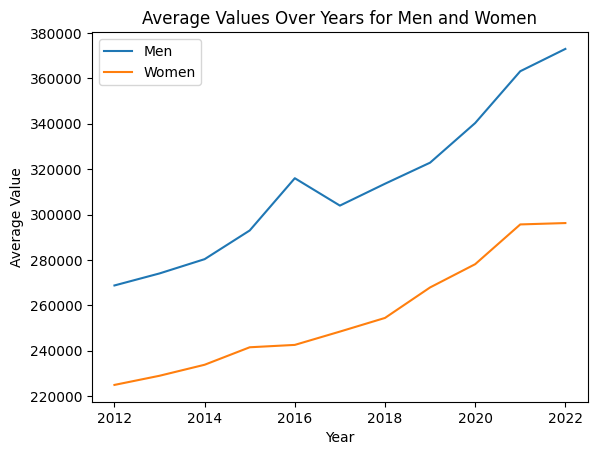

In [ ]:
#now that we actually have some data, it is time to explore it.
#we know that this is income data and we ofcourse want to observe some trends across age groups and ethnicity 
#we start by simply looking at each group in terms of men and women over time

#Here we quite simply say that gender has to be men and we take everything but the first two rows, all rows except the last which is gender
men_avg = combined_data[combined_data['gender'] == 'men'].iloc[:, 2:-1].mean()

# and the same for women
women_avg = combined_data[combined_data['gender'] == 'women'].iloc[:, 2:-1].mean()


#Here we plot via the years which re now shown as index. This happens since the mean is taken for each year. 
plt.plot(men_avg.index.astype(int), men_avg, label='Men')
plt.plot(women_avg.index.astype(int), women_avg, label='Women')

#lastly we just add some labeels and a title
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Values Over Years for Men and Women')
plt.legend()
plt.show()




In the above plot we see that men despite age and ethnicity always earns around 40.000 DKK more than women. This stays rather consistent no matter the period. To further analyze it, since looking at plots can be confusing one may wish to look at a table instead.


In [ ]:
diff = men_avg - women_avg
diff_pct = women_avg/men_avg

print(diff_pct)
print(diff)


#see what causes this, is the effect the in each ethcnic 
#we may see that 
#we excpet to see

2012    0.837031
2013    0.835575
2014    0.834132
2015    0.824431
2016    0.767710
2017    0.817452
2018    0.811525
2019    0.829816
2020    0.817349
2021    0.814209
2022    0.794376
dtype: float64
2012    43800.533333
2013    45063.200000
2014    46500.800000
2015    51438.933333
2016    73401.666667
2017    55482.800000
2018    59098.666667
2019    54942.200000
2020    62154.133333
2021    67461.866667
2022    76683.400000
dtype: float64


Here we see that on avearge, and farily consistently women earn around 80 percent and this is just on average. 
We also see that the acutal amount that men and women earn greatly differs over time, and is ever increasing.   

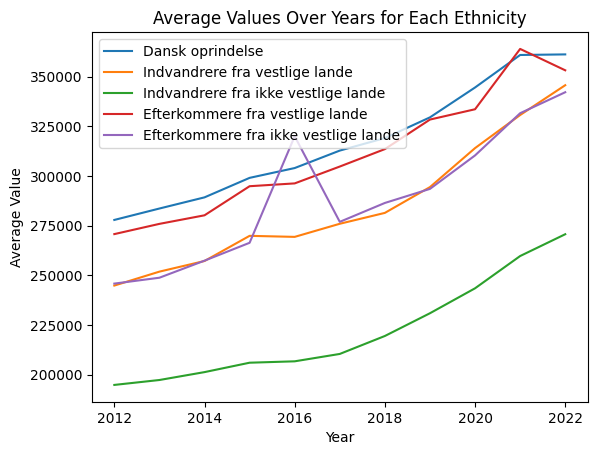

In [ ]:
ethnicities = combined_data['Ethnicity'].unique()

# Plot the average values for each ethnicity
for ethnicity in ethnicities:
    ethnicity_data = combined_data[combined_data['Ethnicity'] == ethnicity]
    avg_values = ethnicity_data.iloc[:, 2:-1].mean()
    plt.plot(avg_values.index.astype(int), avg_values, label=ethnicity)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Values Over Years for Each Ethnicity')
plt.legend()

# Show plot
plt.show()

In [ ]:
# Assuming df is your DataFrame containing the data
# Replace this with your actual DataFrame name

# Calculate the average income for each combination of age group, ethnicity, and gender
average_income = combined_data.groupby(['Age_group', 'Ethnicity', 'gender']).mean()



# Find the combination with the lowest average income
lowest_avg_income = average_income.iloc[:, 2:-1].idxmin()

print("Combination with the lowest average income:")
print(lowest_avg_income)

Combination with the lowest average income:
2014    (Under 29 år, Efterkommere fra ikke vestlige l...
2015    (Under 29 år, Efterkommere fra ikke vestlige l...
2016    (Under 29 år, Efterkommere fra ikke vestlige l...
2017    (Under 29 år, Efterkommere fra ikke vestlige l...
2018    (Under 29 år, Efterkommere fra ikke vestlige l...
2019    (Under 29 år, Efterkommere fra ikke vestlige l...
2020    (Under 29 år, Efterkommere fra ikke vestlige l...
2021    (Under 29 år, Efterkommere fra vestlige lande,...
dtype: object


C:\Users\haber\AppData\Local\Temp\ipykernel_37620\4031426432.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_income = combined_data.groupby(['Age_group', 'Ethnicity', 'gender']).mean()


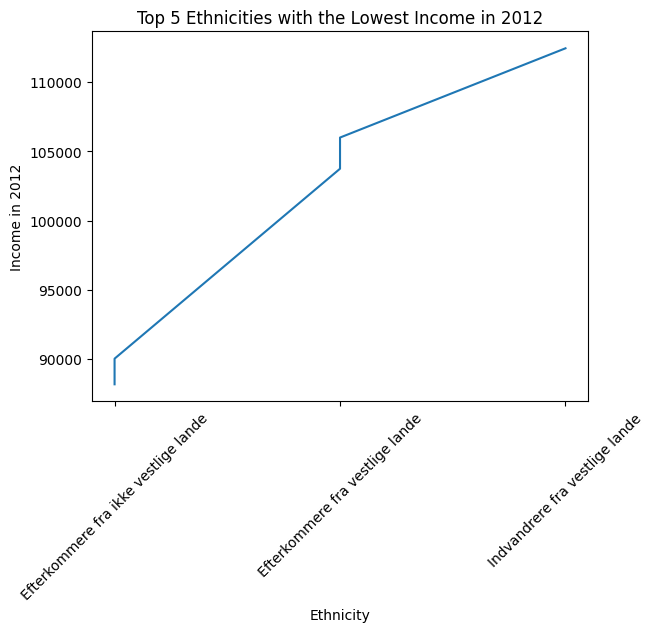

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Replace this with your actual DataFrame name

# Find the top 5 rows with the smallest values in the '2012' column
top_5_smallest = combined_data.nsmallest(5, '2012')

# Plotting
plt.plot(top_5_smallest['Ethnicity'], top_5_smallest['2012'])

# Adding labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Income in 2012')
plt.title('Top 5 Ethnicities with the Lowest Income in 2012')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


# Read and clean data

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

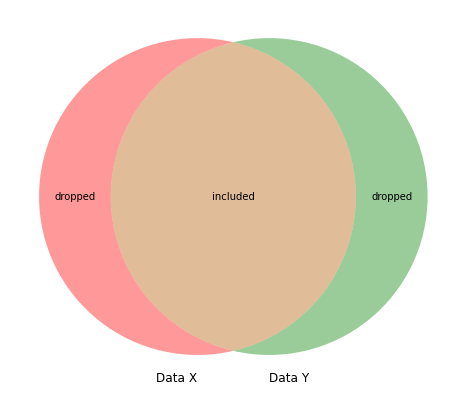

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.